In [201]:
import sklearn
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
import numpy as np

In [275]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as lda
from sklearn.neighbors import KNeighborsClassifier as knc
from sklearn.naive_bayes import GaussianNB as gnb
from sklearn.tree import DecisionTreeClassifier as dtc
from sklearn.svm import SVC as svc
from sklearn.linear_model import LogisticRegression as lg
from sklearn.ensemble import RandomForestClassifier as rfc

In [90]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [65]:
dic_data = datasets.load_iris(as_frame=True)
print(dic_data.keys())

df = dic_data['frame'] # pandas dataframe data + target
df_X = dic_data['data'] # pandas dataframe data only
ser_y = dic_data['target'] # pandas series target only
df_names = pd.DataFrame(dic_data['target_names'], columns=['species'])
df = pd.merge(df, df_names, left_on='target', right_index=True)
df.drop('target', axis=1, inplace=True)

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [66]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [163]:
x = df.iloc[:,:-1].values
x[0:10]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

In [164]:
y = df['species']
y[0:10]

0    setosa
1    setosa
2    setosa
3    setosa
4    setosa
5    setosa
6    setosa
7    setosa
8    setosa
9    setosa
Name: species, dtype: object

In [134]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=10)

In [78]:
x_test

array([[5.8, 4. , 1.2, 0.2],
       [5.1, 2.5, 3. , 1.1],
       [6.6, 3. , 4.4, 1.4],
       [5.4, 3.9, 1.3, 0.4],
       [7.9, 3.8, 6.4, 2. ],
       [6.3, 3.3, 4.7, 1.6],
       [6.9, 3.1, 5.1, 2.3],
       [5.1, 3.8, 1.9, 0.4],
       [4.7, 3.2, 1.6, 0.2],
       [6.9, 3.2, 5.7, 2.3],
       [5.6, 2.7, 4.2, 1.3],
       [5.4, 3.9, 1.7, 0.4],
       [7.1, 3. , 5.9, 2.1],
       [6.4, 3.2, 4.5, 1.5],
       [6. , 2.9, 4.5, 1.5],
       [4.4, 3.2, 1.3, 0.2],
       [5.8, 2.6, 4. , 1.2],
       [5.6, 3. , 4.5, 1.5],
       [5.4, 3.4, 1.5, 0.4],
       [5. , 3.2, 1.2, 0.2],
       [5.5, 2.6, 4.4, 1.2],
       [5.4, 3. , 4.5, 1.5],
       [6.7, 3. , 5. , 1.7],
       [5. , 3.5, 1.3, 0.3],
       [7.2, 3.2, 6. , 1.8],
       [5.7, 2.8, 4.1, 1.3],
       [5.5, 4.2, 1.4, 0.2],
       [5.1, 3.8, 1.5, 0.3],
       [6.1, 2.8, 4.7, 1.2],
       [6.3, 2.5, 5. , 1.9]])

In [136]:
svc_model = svc()
knn_model = knc(n_neighbors=1)

In [137]:
svc_model.fit(x_train, y_train)
knn_model.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [138]:
svc_prediction = svc_model.predict(x_test)
knn_prediction = knn_model.predict(x_test)

In [149]:
cm_svc=confusion_matrix(svc_prediction, y_test, labels=dic_data['target_names'])
cm_knn=confusion_matrix(knn_prediction, y_test, labels=dic_data['target_names'])
print(accuracy_score(svc_prediction, y_test))
print(accuracy_score(knn_prediction, y_test))
print(cm_sv)
print(classification_report(knn_prediction, y_test))

0.9666666666666667
1.0


NameError: name 'cm_sv' is not defined

In [126]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

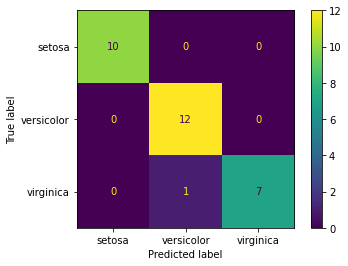

In [148]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm_svc, display_labels=dic_data['target_names'])
disp.plot()

In [144]:
knn_model = knc(n_neighbors=10)
knn_model.fit(x_train, y_train)
knn_prediction = knn_model.predict(x_test)
print(accuracy_score(knn_prediction, y_test))

1.0


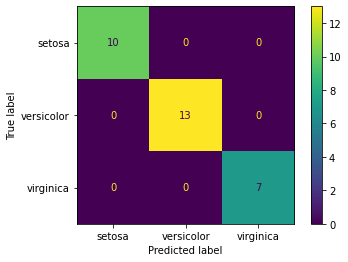

In [150]:
cm_knn=confusion_matrix(knn_prediction, y_test, labels=dic_data['target_names'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm_knn, display_labels=dic_data['target_names'])
disp.plot()

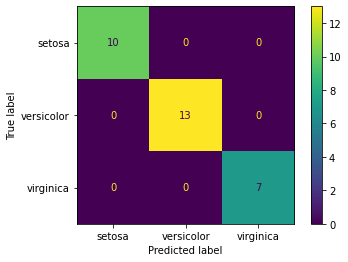

In [151]:
#Esta es la forma mas facil de graficar las matrix de confusion, sin mas pasos adicionales
ConfusionMatrixDisplay.from_predictions(y_test, knn_prediction)

Accuracy (train) for L1 logistic: 83.3% 
Accuracy (train) for L2 logistic (Multinomial): 82.7% 
Accuracy (train) for L2 logistic (OvR): 79.3% 
Accuracy (train) for Linear SVC: 82.0% 
Accuracy (train) for GPC: 82.7% 


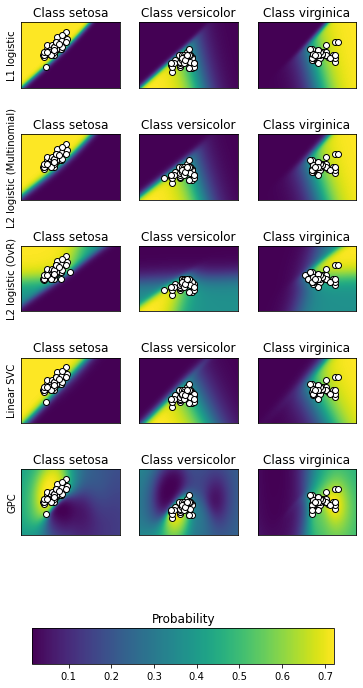

In [162]:
# Author: Alexandre Gramfort <alexandre.gramfort@inria.fr>
# License: BSD 3 clause

import matplotlib.pyplot as plt
import numpy as np

from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data[:, 0:2]  # we only take the first two features for visualization
y = iris.target

n_features = X.shape[1]

C = 10
kernel = 1.0 * RBF([1.0, 1.0])  # for GPC

# Create different classifiers.
classifiers = {
    "L1 logistic": LogisticRegression(
        C=C, penalty="l1", solver="saga", multi_class="multinomial", max_iter=10000
    ),
    "L2 logistic (Multinomial)": LogisticRegression(
        C=C, penalty="l2", solver="saga", multi_class="multinomial", max_iter=10000
    ),
    "L2 logistic (OvR)": LogisticRegression(
        C=C, penalty="l2", solver="saga", multi_class="ovr", max_iter=10000
    ),
    "Linear SVC": SVC(kernel="linear", C=C, probability=True, random_state=0),
    "GPC": GaussianProcessClassifier(kernel),
}

n_classifiers = len(classifiers)

plt.figure(figsize=(3 * 2, n_classifiers * 2))
plt.subplots_adjust(bottom=0.2, top=0.95)

xx = np.linspace(3, 9, 100)
yy = np.linspace(1, 5, 100).T
xx, yy = np.meshgrid(xx, yy)
Xfull = np.c_[xx.ravel(), yy.ravel()]

for index, (name, classifier) in enumerate(classifiers.items()):
    classifier.fit(X, y)

    y_pred = classifier.predict(X)
    accuracy = accuracy_score(y, y_pred)
    print("Accuracy (train) for %s: %0.1f%% " % (name, accuracy * 100))

    # View probabilities:
    probas = classifier.predict_proba(Xfull)
    n_classes = np.unique(y_pred).size
    for k in range(n_classes):
        plt.subplot(n_classifiers, n_classes, index * n_classes + k + 1)
        plt.title(f"Class {iris.target_names[k]}")
        if k == 0:
            plt.ylabel(name)
        imshow_handle = plt.imshow(
            probas[:, k].reshape((100, 100)), extent=(3, 9, 1, 5), origin="lower"
        )
        plt.xticks(())
        plt.yticks(())
        idx = y_pred == k
        if idx.any():
            plt.scatter(X[idx, 0], X[idx, 1], marker="o", c="w", edgecolor="k")

ax = plt.axes([0.15, 0.04, 0.7, 0.05])
plt.title("Probability")
plt.colorbar(imshow_handle, cax=ax, orientation="horizontal")

plt.show()

[Text(0.5, 0.9166666666666666, 'X[2] <= 2.45\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(0.4230769230769231, 0.75, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(0.5769230769230769, 0.75, 'X[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(0.3076923076923077, 0.5833333333333334, 'X[2] <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(0.15384615384615385, 0.4166666666666667, 'X[3] <= 1.65\ngini = 0.041\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(0.07692307692307693, 0.25, 'gini = 0.0\nsamples = 47\nvalue = [0, 47, 0]'),
 Text(0.23076923076923078, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.46153846153846156, 0.4166666666666667, 'X[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(0.38461538461538464, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.5384615384615384, 0.25, 'X[2] <= 5.45\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(0.46153846153846156, 0.08333333333333333, 'gini

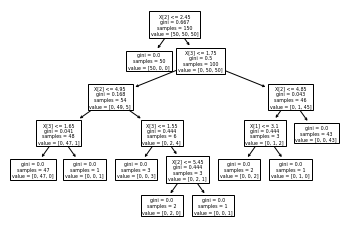

In [170]:
from sklearn import tree
clf = dtc()
clf.fit(x, y)
tree.plot_tree(clf)

In [197]:
dfm = pd.read_csv('mushrooms.csv', sep=";")
dfm

,family,name,class,cap-diameter,cap-shape,Cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,Spore-print-color,habitat,season
0,Amanita Family,Fly Agaric,p,"[10, 20]","[x, f]","[g, h]","[e, o]",[f],[e],NaN,...,[s],[y],[w],[u],[w],[t],"[g, p]",NaN,[d],"[u, a, w]"
1,Amanita Family,Panther Cap,p,"[5, 10]","[p, x]",[g],[n],[f],[e],NaN,...,NaN,[y],[w],[u],[w],[t],[p],NaN,[d],"[u, a]"
2,Amanita Family,False Panther Cap,p,"[10, 15]","[x, f]",NaN,"[g, n]",[f],[e],NaN,...,NaN,NaN,[w],[u],[w],[t],"[e, g]",NaN,[d],"[u, a]"
3,Amanita Family,The Blusher,e,"[5, 15]","[x, f]",NaN,[n],[t],NaN,NaN,...,[b],NaN,[w],[u],[w],[t],[g],NaN,[d],"[u, a]"
4,Amanita Family,Death Cap,p,"[5, 12]","[x, f]",[h],[r],[f],NaN,[c],...,NaN,NaN,[w],[u],[w],[t],"[g, p]",NaN,[d],"[u, a]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168,Saddle-Cup Family,White Saddle,p,"[2, 6]",[o],NaN,[w],[f],[f],[f],...,NaN,[g],[w],NaN,NaN,[t],[f],NaN,"[p, d]","[u, a]"
169,Bracket Fungi,Elfin's Saddle,p,"[2, 4]",[o],NaN,"[g, k]",[f],[f],[f],...,NaN,[g],"[g, n]",NaN,NaN,[f],[f],NaN,[d],"[u, a]"
170,Bracket Fungi,Turban Fungus,p,"[5, 15]",[o],NaN,"[n, e]",[f],[f],[f],...,NaN,[g],[n],NaN,NaN,[f],[f],NaN,[d],"[s, u]"
171,Morel Family,Common Morel,e,"[3, 8]","[p, c, o]",NaN,"[n, g]",[f],[f],[f],...,NaN,NaN,[n],NaN,NaN,[f],[f],NaN,"[l, d]",[s]


In [182]:
xm = dfm.iloc[:,3:6].values
ym = dfm['class']
xm_train, xm_test, ym_train, ym_test = train_test_split(xm, ym, test_size=0.20, random_state=10, shuffle=True)

In [232]:
svc_model_m = svc()
knn_model_m = knc(n_neighbors=1)

In [185]:
#svc_model_m.fit(xm_train, ym_train)
knn_model_m.fit(xm_train, ym_train)

ValueError: could not convert string to float: '[3, 5]'

In [237]:
dfm[['min-cap-diameter', 'max-cap-diameter']] = pd.DataFrame(
    dfm['cap-diameter'].apply(lambda x: eval(x)).tolist(),
    index=dfm.index
)
dfm

,family,name,class,cap-diameter,cap-shape,Cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,...,stem-color,veil-type,veil-color,has-ring,ring-type,Spore-print-color,habitat,season,min-cap-diameter,max-cap-diameter
0,Amanita Family,Fly Agaric,p,"[10, 20]","[x, f]","[g, h]","[e, o]",[f],[e],NaN,...,[w],[u],[w],[t],"[g, p]",NaN,[d],"[u, a, w]",10.0,20.0
1,Amanita Family,Panther Cap,p,"[5, 10]","[p, x]",[g],[n],[f],[e],NaN,...,[w],[u],[w],[t],[p],NaN,[d],"[u, a]",5.0,10.0
2,Amanita Family,False Panther Cap,p,"[10, 15]","[x, f]",NaN,"[g, n]",[f],[e],NaN,...,[w],[u],[w],[t],"[e, g]",NaN,[d],"[u, a]",10.0,15.0
3,Amanita Family,The Blusher,e,"[5, 15]","[x, f]",NaN,[n],[t],NaN,NaN,...,[w],[u],[w],[t],[g],NaN,[d],"[u, a]",5.0,15.0
4,Amanita Family,Death Cap,p,"[5, 12]","[x, f]",[h],[r],[f],NaN,[c],...,[w],[u],[w],[t],"[g, p]",NaN,[d],"[u, a]",5.0,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168,Saddle-Cup Family,White Saddle,p,"[2, 6]",[o],NaN,[w],[f],[f],[f],...,[w],NaN,NaN,[t],[f],NaN,"[p, d]","[u, a]",2.0,6.0
169,Bracket Fungi,Elfin's Saddle,p,"[2, 4]",[o],NaN,"[g, k]",[f],[f],[f],...,"[g, n]",NaN,NaN,[f],[f],NaN,[d],"[u, a]",2.0,4.0
170,Bracket Fungi,Turban Fungus,p,"[5, 15]",[o],NaN,"[n, e]",[f],[f],[f],...,[n],NaN,NaN,[f],[f],NaN,[d],"[s, u]",5.0,15.0
171,Morel Family,Common Morel,e,"[3, 8]","[p, c, o]",NaN,"[n, g]",[f],[f],[f],...,[n],NaN,NaN,[f],[f],NaN,"[l, d]",[s],3.0,8.0


In [238]:
dfm.describe()
dfm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173 entries, 0 to 172
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   family                173 non-null    object 
 1   name                  173 non-null    object 
 2   class                 173 non-null    object 
 3   cap-diameter          173 non-null    object 
 4   cap-shape             173 non-null    object 
 5   Cap-surface           133 non-null    object 
 6   cap-color             173 non-null    object 
 7   does-bruise-or-bleed  173 non-null    object 
 8   gill-attachment       145 non-null    object 
 9   gill-spacing          102 non-null    object 
 10  gill-color            173 non-null    object 
 11  stem-height           173 non-null    object 
 12  stem-width            173 non-null    object 
 13  stem-root             27 non-null     object 
 14  stem-surface          65 non-null     object 
 15  stem-color            1

In [223]:
xm = dfm.iloc[:,23:24].values
ym = dfm['class']
xm_train, xm_test, ym_train, ym_test = train_test_split(xm, ym, test_size=0.20, random_state=10, shuffle=True)

In [224]:
svc_model_m = svc()
knn_model_m = knc(n_neighbors=1)

In [233]:
svc_model_m.fit(xm_train, ym_train)
knn_model_m.fit(xm_train, ym_train)
svc_prediction_m = svc_model_m.predict(xm_test)
knn_prediction_m = knn_model_m.predict(xm_test)

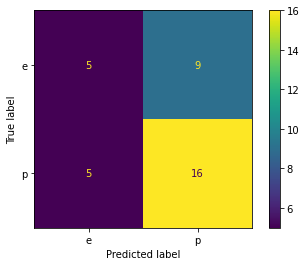

In [235]:
ConfusionMatrixDisplay.from_predictions(ym_test, knn_prediction_m)

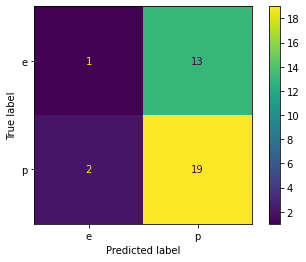

In [230]:
ConfusionMatrixDisplay.from_predictions(ym_test, svc_prediction_m)

In [234]:
print(classification_report(knn_prediction_m, ym_test))

              precision    recall  f1-score   support

           e       0.36      0.50      0.42        10
           p       0.76      0.64      0.70        25

    accuracy                           0.60        35
   macro avg       0.56      0.57      0.56        35
weighted avg       0.65      0.60      0.62        35



In [263]:
dfm['cap-shape']=dfm['cap-shape'].str.replace(r"\[|\]","", regex=True).str.split(",").apply(lambda x: [e.strip() for e in x]).tolist()

In [270]:
dfm=dfm.explode('cap-shape')
dfm

In [265]:
from sklearn.preprocessing import LabelEncoder

In [273]:
le = LabelEncoder()
dfm['cap-shape'] = le.fit_transform(dfm['cap-shape'])
dfm

,family,name,class,cap-diameter,cap-shape,Cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,...,stem-color,veil-type,veil-color,has-ring,ring-type,Spore-print-color,habitat,season,min-cap-diameter,max-cap-diameter
0,Amanita Family,Fly Agaric,p,"[10, 20]",6,"[g, h]","[e, o]",[f],[e],NaN,...,[w],[u],[w],[t],"[g, p]",NaN,[d],"[u, a, w]",10.0,20.0
0,Amanita Family,Fly Agaric,p,"[10, 20]",2,"[g, h]","[e, o]",[f],[e],NaN,...,[w],[u],[w],[t],"[g, p]",NaN,[d],"[u, a, w]",10.0,20.0
1,Amanita Family,Panther Cap,p,"[5, 10]",4,[g],[n],[f],[e],NaN,...,[w],[u],[w],[t],[p],NaN,[d],"[u, a]",5.0,10.0
1,Amanita Family,Panther Cap,p,"[5, 10]",6,[g],[n],[f],[e],NaN,...,[w],[u],[w],[t],[p],NaN,[d],"[u, a]",5.0,10.0
2,Amanita Family,False Panther Cap,p,"[10, 15]",6,NaN,"[g, n]",[f],[e],NaN,...,[w],[u],[w],[t],"[e, g]",NaN,[d],"[u, a]",10.0,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171,Morel Family,Common Morel,e,"[3, 8]",1,NaN,"[n, g]",[f],[f],[f],...,[n],NaN,NaN,[f],[f],NaN,"[l, d]",[s],3.0,8.0
171,Morel Family,Common Morel,e,"[3, 8]",3,NaN,"[n, g]",[f],[f],[f],...,[n],NaN,NaN,[f],[f],NaN,"[l, d]",[s],3.0,8.0
172,Jelly Discs Family,Jelly Babies,p,"[1, 1.5]",6,[s],[y],[f],[f],[f],...,[y],NaN,NaN,[f],[f],NaN,[d],"[u, a]",1.0,1.5
172,Jelly Discs Family,Jelly Babies,p,"[1, 1.5]",2,[s],[y],[f],[f],[f],...,[y],NaN,NaN,[f],[f],NaN,[d],"[u, a]",1.0,1.5


# Tarea 4
Con el dataset "exploded", realice la limpieza de datos que considere necesaria, crear un modelo en al menos dos algoritmos de clasificacion, relacionado a si es posible predecir que hongos son comestibles por las caracteristicas que describe el dataset.  Analice los resultados y justifique sus resultados finales, y cual considera que es el mejor algoritmo.  Incluya graficas, matrices de confusion, informes de prediccion, etc. 

Debe de entregar un notebook con el contenido de las transformaciones que realizo e incluyendo las graficas y/o tablas necesarias para justificar su respuesta.

In [276]:
rfcm = rfc(max_depth=2, random_state=0)
rfcm_model = rfcm()